**to analyze the type of customers in the market based on the features**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
data = pd.read_csv("Example.csv")


<function matplotlib.pyplot.show>

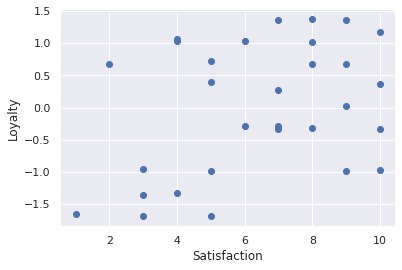

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

In [5]:
X = data.copy()

In [6]:
#clusteering
from sklearn.cluster import KMeans
kmeans=KMeans(2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters =X.copy()
clusters['cluster_pred']= kmeans.fit_predict(X)

<function matplotlib.pyplot.show>

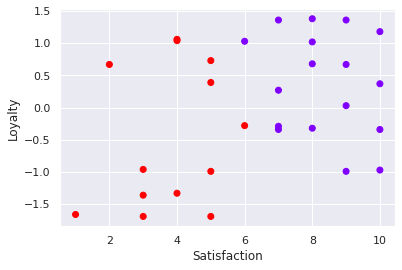

In [9]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c= clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(X)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [12]:
#elbow method
wcss=[]
for i in range (1,30):
  kmeans =KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.4452782965900175,
 4.380320178840311,
 3.7972682187482842,
 3.1901046790773417,
 2.7955334338350952,
 2.4423909021920496,
 2.092594598754006,
 1.8188030408829692,
 1.651911733041016,
 1.3475153434254803,
 1.1645532493533497,
 0.9837279397360106,
 0.8190337391325484,
 0.6709407271386654,
 0.5442873170826725,
 0.4239312504600061,
 0.34762882648954263,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

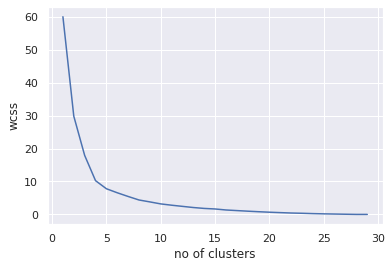

In [13]:
plt.plot(range(1,30),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
kmeans_new= KMeans(4)
kmeans_new.fit(x_scaled)

cluster_new = X.copy()
cluster_new['cluster_pred']= kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,1
9,8,0.68,1


<function matplotlib.pyplot.show>

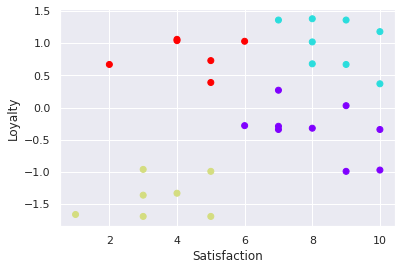

In [17]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c= cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show